In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from scipy.interpolate import interp1d

In [12]:
def interp_log(x, y, n_point=200):
    # Transform x1, x2, y1, and y2 into log10 space
    log10_x = np.log10(x)
    log10_y = np.log10(y)

    log10_x_new = np.linspace(np.log10(x.min()), np.log10(x.max()), n_point - 1)
    log10_x_new = np.append(log10_x_new, np.log10(x.max()))  # Include the last x value

    # Interpolate log10_y1 and log10_y2 to the common log10_x grid
    log10_y_new = interp1d(log10_x, log10_y, kind='linear')(log10_x_new)
    
    # Transform interpolated log10 values back to the original space
    x_new = 10**log10_x_new
    y_new = 10**log10_y_new

    return x_new, y_new

def interp_xlog(x, y, n_point=200):
    # Transform x1, x2, y1, and y2 into log10 space
    log10_x = np.log10(x)
    
    log10_x_new = np.linspace(np.log10(x.min()), np.log10(x.max()), n_point - 1)
    log10_x_new = np.append(log10_x_new, np.log10(x.max()))  # Include the last x value

    # Interpolate log10_y1 and log10_y2 to the common log10_x grid
    y_new = interp1d(log10_x, y, kind='linear')(log10_x_new)
    
    # Transform interpolated log10 values back to the original space
    x_new = 10**log10_x_new

    return x_new, y_new

In [13]:
# load data
dir_emu = './'

cosmos = np.loadtxt(os.path.join(dir_emu, 'input_reference_EE2_narrow_sensitivity.txt'))

lg_k = np.loadtxt(os.path.join(dir_emu, 'lgk.txt'), usecols=(0))
k = 10**lg_k
# z = 0
Ps = np.loadtxt(os.path.join(dir_emu, 'matter_pow_mode_z0.txt'))

# interpolate the data k, Ps in log space
# k, Ps = interp_log(k, Ps)



In [14]:
Ps.shape

(151, 64)

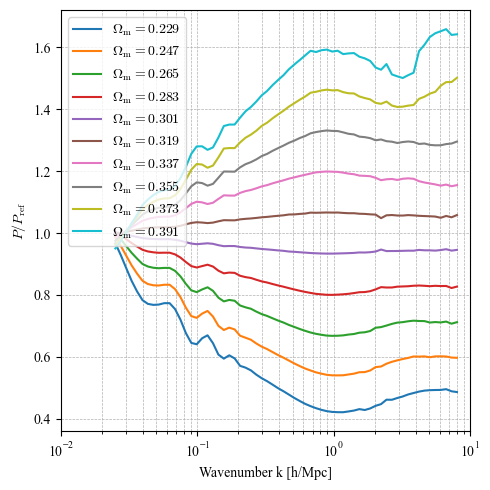

In [15]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# zs_str = ['0', '0.2', '0.5', '1', '2', '3', '4', '9', '49', '99']
# zs_str = ['0','99']

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(10):
    i_cosmo = i + 51 
    ra_P = Ps[i_cosmo]/Ps[0]

    plt.plot(k, ra_P, label=r'$\Omega_\mathrm{m}=%.3f$' % cosmos[i_cosmo][0])
    
# plt.plot(k_com, ra_P, color=colors[j], ls='--')

        
# plt.xlim([1e-3, 10])

xlim1 = 1e-2
xlim2 = 10
plt.xlim(xlim1, xlim2)

plt.xscale('log')
# plt.ylim([.95, 1.05])
plt.xlabel('Wavenumber k [h/Mpc]')
plt.ylabel(r'$P/P_\mathrm{ref}$')
plt.legend()
# plt.title('Linear Matter Power Spectrum')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()
# plt.savefig('matter_power_CLASS_CAMB_ratio_Nncdm3.pdf')
    

In [16]:
# calculate maximum fractional range width for each parameter
num_params = 10
num_vary = 10
range_widths = []
start = 51
sensitive_k_modes = []  # To store the most sensitive k-modes


for i in range(num_params):
    ra_Ps = []
    for j in range(num_vary):
        ra_P = Ps[j + start + i*num_vary ]/Ps[0]
        ra_Ps.append(ra_P)

    ra_Ps = np.array(ra_Ps)
    # interpolate the data k, Ps, where k in log space
    k_new, ra_Ps = interp_xlog(k, ra_Ps, n_point=200)
    # max and min values
    ra_P_max = np.max(ra_Ps, axis=0)
    ra_P_min = np.min(ra_Ps, axis=0)
    # ra_P_0 = Ps[0 + start + i*num_vary ]/Ps[0]
    # ra_P_1 = Ps[num_vary - 1 + start + i*num_vary ]/Ps[0]

    # fractional range width (absolute value)
    range_width = ra_P_max - ra_P_min
    ind_max = np.argmax(range_width)
    max_k_mode = k_new[ind_max]  # Find the k corresponding to max width
    range_widths.append(range_width[ind_max])
    sensitive_k_modes.append(max_k_mode)


In [17]:
# k_new

In [18]:
range_widths

[1.1679230320012335,
 0.25261250744864705,
 0.7520442627770896,
 1.2497376224408066,
 0.5365136384401995,
 1.1376877716460299,
 0.3917089945432298,
 0.4372820621191289,
 0.45090926313326274,
 0.2268308682540151]

In [19]:
def plot_one_param(ax, i, k, Ps, cosmos, num_vary=9, start=1, color_list=None):

    param_names = [r'$\Omega_\mathrm{m}$', r'$\Omega_\mathrm{b}$', r'$h$',r'$A_\mathrm{s}/10^{-9}$',r'$n_\mathrm{s}$', r'$w_\mathrm{0}$',r'$w_a$',r'$\sum m_\nu/\mathrm{eV}$',r'$N_\mathrm{eff}$',r'$\alpha_s$',r'$m_\mathrm{WDM}^{-1}$']
    formats = [r'$%.3f$',r'$%.3f$',r'$%.3f$',r'$%.2f$',r'$%.3f$',r'$%.3f$',r'$%.3f$',r'$%.3f$',r'$%.2f$',r'$%.3f$',r'$%.2f$']
    P_ref = Ps[0]
    cosmo_ref = cosmos[0]
    ax.grid(True)
    
    
    for j in range(num_vary):
        j_cosmo = j + start + i*num_vary 
        ra_P = Ps[j_cosmo]/P_ref
        # interpolate the data k, Ps, where k in log space
        k_new, ra_P = interp_xlog(k, ra_P, n_point=200)
        label = formats[i] % cosmos[j_cosmo][i]
        if param_names[i] == r'$A_\mathrm{s}/10^{-9}$':
            label = formats[i] % (cosmos[j_cosmo][i]/1e-9)
            cosmo_ref_i = cosmo_ref[i]/1e-9
        else:
            cosmo_ref_i = cosmo_ref[i]
        
        ax.plot(k_new, ra_P, label=label, color=color_list[j])  # Example plot with varying slope
    ax.set_title(f'{param_names[i]} (reference: {cosmo_ref_i})')  # Adding titles to each subplot
    ax.set_xscale('log')

    ax.axhline(y=1, color='grey', linestyle='--')
    

    # if param_names[i] == r'$A_\mathrm{s}$':
    #     custom_text = r'$A_\mathrm{s}/10^{-9}$'
    #         # Create a legend handle for the custom text
    #     # Using a patch as a placeholder for text, setting its alpha to 0 so it's invisible
    #     custom_handle = mpatches.Patch(color='none', alpha=0)
        
    #     # Retrieve the current handles and labels
    #     handles, labels = ax.get_legend_handles_labels()
        
    #     # Insert the custom text at the beginning of the handles and labels lists
    #     handles.insert(0, custom_handle)
    #     labels.insert(0, custom_text)
        
    #     # Place legend to the right of the subplot, including the custom text at the beginning
    #     ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
    # else:
    #     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    


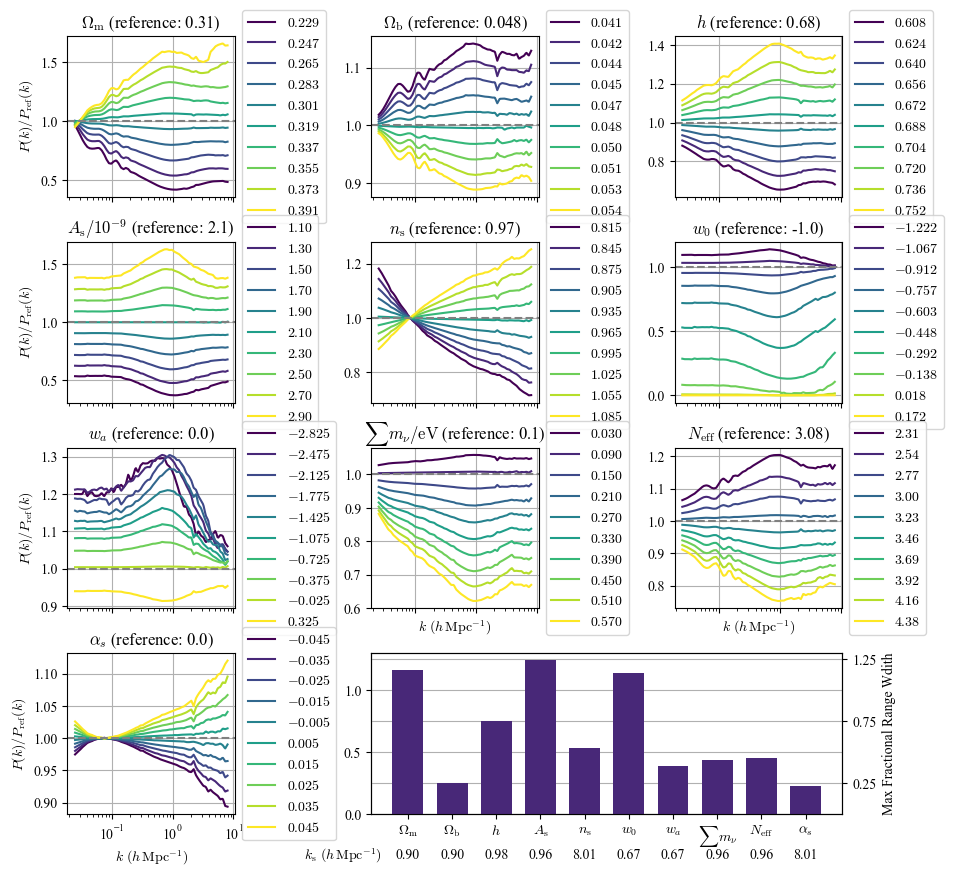

In [33]:
cmap = "viridis"
cmap = plt.get_cmap(cmap)
color_list = [x for x in cmap(np.arange(num_vary)/(num_vary-1))]

param_names = [r'$\Omega_\mathrm{m}$', r'$\Omega_\mathrm{b}$', r'$h$',r'$A_\mathrm{s}$',r'$n_\mathrm{s}$', r'$w_\mathrm{0}$',r'$w_a$',r'$\sum m_\nu$',r'$N_\mathrm{eff}$',r'$\alpha_s$']
# Create a 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(10, 10.1), sharex=True)  # Adjusted for a 4x3 grid
plt.subplots_adjust(hspace=0.28, wspace=0.81)  # Adjust the space between subplots
gs = gridspec.GridSpec(4, 3, figure=fig)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'

# Flatten the array of axes for easier access
axes_list = axs.ravel()

# Iterate over each subplot using the flattened list
for i, ax in enumerate(axes_list):
    if i == 10:
        break
    plot_one_param(ax, i, k, Ps, cosmos, num_vary=num_vary, start=start, color_list=color_list)
    

# Optionally, you can hide the last subplot (12th) if not in use
axes_list[10].axis('off')
axes_list[11].axis('off')

for i in [0,3,6,9]:
    axes_list[i].set_ylabel(r'$P(k)/P_\mathrm{ref}(k)$')

for i in [7,8,9]:
    axes_list[i].set_xlabel(r'$k\ (h\,\mathrm{Mpc}^{-1})$')

# np.random.seed(42)  # For reproducibility
# range_widths = np.random.uniform(0.01, 0.2, size=len(param_names))
widened_ax = fig.add_subplot(gs[3, 1:])
# fig.add_subplot(gs[3, 2]).axis('off')
# Plot a horizontal bar chart using ax
# ax_right.bar(param_names, range_widths, width=.7,color=color_list[1])
widened_ax.yaxis.set_label_position('right')
# grid
widened_ax.set_ylim(0,1.3)
widened_ax.grid(True,axis='y')
widened_ax.set_axisbelow(True)
# y ticks both sides
# widened_ax.yaxis.tick_right()


# Add a second y-axis on the right for mirrored ticks
ax_right = widened_ax.twinx()  # Create a twin y-axis
ax_right.set_ylim(0,1.3)
# ax_right.set_yticks(widened_ax.get_yticks())  # Mirror y-ticks
# ax_right.set_yticklabels([])  # Optionally hide the labels
ax_right.bar(param_names, range_widths, width=.7,color=color_list[1])
ax_right.set_ylabel('Max Fractional Range Wdith')
ax_right.set_yticks([0.25,0.75,1.25])
ax_right.grid(True,axis='y')
ax_right.set_axisbelow(True)
# ax_right.spines['right'].set_visible(True)
# plt.show()  # Display the figure with the subplots
# Annotate the most sensitive k-mode beneath the x-labels

for i, k_mode in enumerate(sensitive_k_modes):
    widened_ax.text(
        i,                     # x-coordinate (aligned with the parameter)
        -0.27,                 # y-coordinate (slightly below the x-axis)
        f'{k_mode:.2f}',       # Format the k-mode value
        ha='center',           # Center-align the text horizontally
        va='top',              # Align the text vertically at the top of the annotation
       # fontsize=10,           # Font size
        transform=widened_ax.transData # Use data coordinates for placement
    )

widened_ax.text(
    -0.06, -0.199, r'$k_\mathrm{s}\ (h\,\mathrm{Mpc}^{-1})$',  # Text to display beneath the x-axis
    ha='center', va='top',# fontsize=12,  # Center the text horizontally and vertically
    transform=widened_ax.transAxes  # Use the axes coordinates for placement
)

plt.savefig('emu_varying_parameter_values.pdf', bbox_inches='tight')  # Save the figure to a file
